In [2]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')  # change pyplots default style
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [3]:
# mpl.use("pgf")  # to display graphs remove this line
mpl.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
line = 0.75

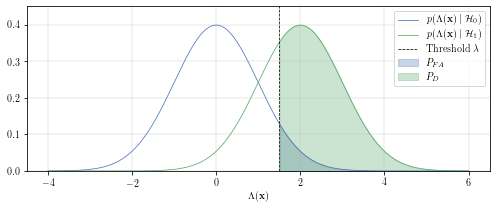

In [4]:
x = np.linspace(-4, 6, 1000)
p1 = stats.norm.pdf(x)
p2 = stats.norm.pdf(x, 2)

plt.figure(figsize=(7, 3))
plt.ylim(-0.0, 0.45)
plt.plot(x, p1, '-', linewidth=line, color='C0', label=r'$p(\Lambda(\mathbf{x})\mid\mathcal{H}_0)$', aa=True)
plt.plot(x, p2, '-', linewidth=line, color='C1', label=r'$p(\Lambda(\mathbf{x})\mid\mathcal{H}_1)$', aa=True)
plt.axvline(1.5, c='k', ls='--', linewidth=line, label=r'Threshold $\lambda$', aa=True)
plt.fill_between(x, p1, 0, x>1.5, alpha=0.3, color='C0', label=r'$P_{FA}$', aa=True)
plt.fill_between(x, p2, 0, x>1.5, alpha=0.3, color='C1', label=r'$P_{D}$', aa=True)
plt.xlabel(r'$\Lambda(\mathbf{x})$')
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=10)
plt.grid(linewidth=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('out/stft.pgf')

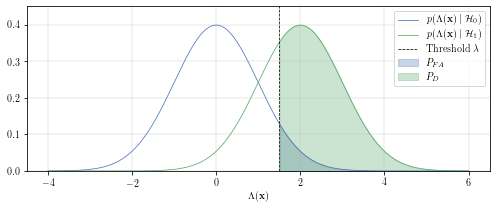

In [5]:
x = np.linspace(-4, 6, 1000)
p1 = stats.norm.pdf(x)
p2 = stats.norm.pdf(x, 2)

plt.figure(figsize=(7, 3))
plt.ylim(-0.0, 0.45)
plt.plot(x, p1, '-', linewidth=line, color='C0', label=r'$p(\Lambda(\mathbf{x})\mid\mathcal{H}_0)$', aa=True)
plt.plot(x, p2, '-', linewidth=line, color='C1', label=r'$p(\Lambda(\mathbf{x})\mid\mathcal{H}_1)$', aa=True)
plt.axvline(1.5, c='k', ls='--', linewidth=line, label=r'Threshold $\lambda$', aa=True)
plt.fill_between(x, p1, 0, x>1.5, alpha=0.3, color='C0', label=r'$P_{FA}$', aa=True)
plt.fill_between(x, p2, 0, x>1.5, alpha=0.3, color='C1', label=r'$P_{D}$', aa=True)
plt.xlabel(r'$\Lambda(\mathbf{x})$')
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=10)
plt.grid(linewidth=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('out/stft.pgf')

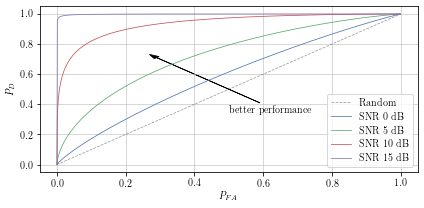

In [6]:
snrs = np.array([0, 5, 10, 15])
pfa = np.linspace(0, 0.999, 1000)

plt.figure(figsize=(6, 3))
plt.plot(pfa,
         pfa,
         '--',
         linewidth=line,
         color='k',
         alpha=0.4,
         label=r'Random',
         aa=True)
for i in snrs:
    roc_chi2 = ss.chi2_stats.roc(noise_power=10,
                                 signal_power=i,
                                 pfa=pfa,
                                 n=10,
                                 dB=True)
    plt.plot(pfa,
             roc_chi2,
             '-',
             linewidth=line,
             label=r'SNR $%d$ dB' % i,
             aa=True)
    
plt.arrow(0.59,
          0.41,
          -0.3,
          0.3,
          linestyle='-',
          head_width=0.02,
          head_length=0.03,
          fc='k',
          ec='k',
          linewidth=line,
          aa=True)
plt.text(0.5,
         0.35,
         r'better performance',
        )

plt.xlabel(r'$P_{FA}$')
plt.ylabel(r'$P_D$')
plt.grid(linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('out/roc_stats.pgf')